# Exercise Solution

In [43]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

In [44]:
df = pd.read_csv("bhp.csv")
df.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
3035,Malleshpalya,2 BHK,1210.0,2.0,55.0,2.0,4545.0
2148,other,2 BHK,975.0,2.0,43.0,2.0,4410.0
630,Singasandra,3 BHK,1440.0,2.0,65.0,3.0,4513.0
3008,Vijayanagar,3 BHK,1527.0,3.0,115.0,3.0,7531.0
986,Raja Rajeshwari Nagar,1 BHK,600.0,1.0,22.0,1.0,3666.0


In [45]:
df.shape

(3923, 7)

In [46]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,3923.000000,3922.000000,3922.000000,3922.000000,3922.000000
mean,1569.111436,2.702448,110.183640,2.811831,6990.114737
std,1425.572813,1.373758,133.381101,1.313917,15372.614771
min,1.000000,1.000000,10.000000,1.000000,267.000000
25%,1100.000000,2.000000,50.000000,2.000000,4284.000000
50%,1290.000000,2.000000,72.000000,3.000000,5459.500000
75%,1663.000000,3.000000,120.000000,3.000000,7290.750000
max,52272.000000,27.000000,2700.000000,27.000000,672727.000000


c:\users\shaon\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\shaon\appdata\local\programs\python\python37\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


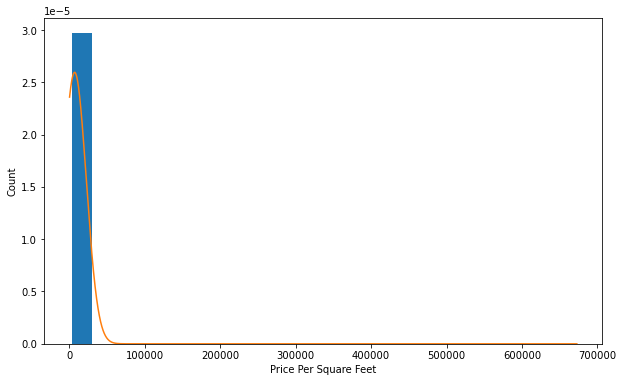

In [47]:
from scipy.stats import norm
import numpy as np

plt.hist(df.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

rng = np.arange(df.price_per_sqft.min(), df.price_per_sqft.max(), 0.1)  # A range between minimum height & maximum height
plt.plot(rng, norm.pdf(rng,df.price_per_sqft.mean(),df.price_per_sqft.std())) # Bell curve usinge range, mean and standar deviation

## Using Percentile

In [54]:
min_thresh,max_thresh=df["price_per_sqft"].quantile([0.0008,0.999]) # passing array as quantile argument
min_thresh,max_thresh

(1306.9088000000002, 38487.500000007916)

In [55]:
df[df["price_per_sqft"]<min_thresh] # below minimum threshold looks like outlier

,location,size,total_sqft,bath,price,bhk,price_per_sqft
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3.0,371.0
798,other,4 Bedroom,10961.0,4.0,80.0,4.0,729.0
1867,other,3 Bedroom,52272.0,2.0,140.0,3.0,267.0
2392,other,4 Bedroom,2000.0,3.0,25.0,4.0,1250.0


In [57]:
df[df["price_per_sqft"]>max_thresh] # above maximum threshold also looks like outlier

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3.0,672727.0
1005,other,1 BHK,15.0,1.0,30.0,1.0,200000.0
1106,other,5 Bedroom,24.0,2.0,150.0,5.0,625000.0
1548,Uttarahalli,5 Bedroom,400.0,5.0,200.0,5.0,50000.0


In [60]:
df2=df[(df["price_per_sqft"]<max_thresh) & (df["price_per_sqft"]>min_thresh)] #Removing outlier

In [61]:
df.shape[0]-df2.shape[0]  # So, we removed 6 outlier so far

9

In [62]:
df=df2
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.0


## Using Standard Deviation

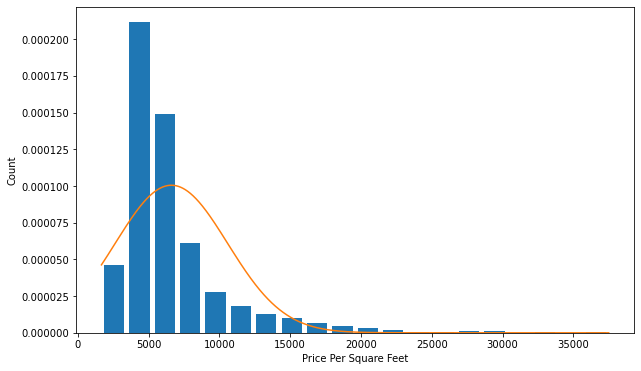

In [63]:
from scipy.stats import norm
import numpy as np

plt.hist(df.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

rng = np.arange(df.price_per_sqft.min(), df.price_per_sqft.max(), 0.1)  # A range between minimum height & maximum height
plt.plot(rng, norm.pdf(rng,df.price_per_sqft.mean(),df.price_per_sqft.std())) # Bell curve usinge range, mean and standar deviation

In [64]:
upper_limit=df.price_per_sqft.mean()+(4*df.price_per_sqft.std())
upper_limit

22482.04576213183

In [65]:
lower_limit=df.price_per_sqft.mean()-(4*df.price_per_sqft.std())
lower_limit

-9265.44586432907

In [67]:
# LEt's see those outliers
df[(df.price_per_sqft>upper_limit) | (df.price_per_sqft<lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6.0,36274.0
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8.0,33333.0
87,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6.0,22535.0
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4.0,27083.0
475,other,4 BHK,1150.0,4.0,260.0,4.0,22608.0
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4.0,23719.0
760,other,9 Bedroom,600.0,9.0,190.0,9.0,31666.0
849,other,4 Bedroom,2400.0,4.0,640.0,4.0,26666.0
925,5th Phase JP Nagar,9 Bedroom,1260.0,11.0,290.0,9.0,23015.0
978,Rajaji Nagar,4 Bedroom,315.0,4.0,90.0,4.0,28571.0


In [68]:
# removing outlier
df2=df[(df.price_per_sqft<upper_limit) & (df.price_per_sqft>lower_limit)]

In [69]:
df2.shape

(3870, 7)

In [70]:
df.shape

(3914, 7)

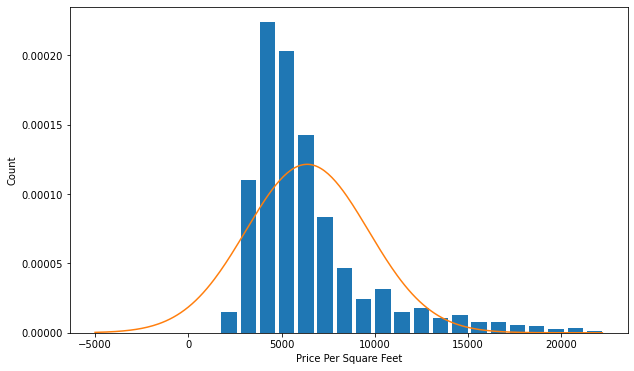

In [71]:
from scipy.stats import norm
import numpy as np

plt.hist(df2.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

rng = np.arange(-5000, df2.price_per_sqft.max(), 100)  # A range between minimum height & maximum height
plt.plot(rng, norm.pdf(rng,df2.price_per_sqft.mean(),df2.price_per_sqft.std())) # Bell curve usinge range, mean and standar deviation

In [72]:
df2.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,3870.000000,3870.000000,3870.000000,3870.000000,3870.000000
mean,1539.778596,2.671835,104.573187,2.778553,6372.503101
std,1025.021841,1.322923,113.375322,1.249577,3287.978349
min,276.000000,1.000000,10.000000,1.000000,1666.000000
25%,1100.000000,2.000000,50.000000,2.000000,4276.000000
50%,1286.000000,2.000000,71.000000,3.000000,5416.000000
75%,1650.750000,3.000000,115.750000,3.000000,7169.750000
max,30000.000000,27.000000,2200.000000,27.000000,22296.000000


## Using Z-score

In [73]:
df['zscore']=(df.price_per_sqft-df.price_per_sqft.mean())/df.price_per_sqft.std()  #  Calculating z-score
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.0,-0.733110
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.0,-0.502288
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.0,-0.580405
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.0,-0.091547
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.0,-0.594264


In [74]:
df[df['zscore']>4]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
9,other,6 Bedroom,1020.0,6.0,370.0,6.0,36274.0,7.475413
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8.0,33333.0,6.734315
87,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6.0,22535.0,4.013344
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4.0,27083.0,5.159387
475,other,4 BHK,1150.0,4.0,260.0,4.0,22608.0,4.031739
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4.0,23719.0,4.311698
760,other,9 Bedroom,600.0,9.0,190.0,9.0,31666.0,6.314250
849,other,4 Bedroom,2400.0,4.0,640.0,4.0,26666.0,5.054308
925,5th Phase JP Nagar,9 Bedroom,1260.0,11.0,290.0,9.0,23015.0,4.134298
978,Rajaji Nagar,4 Bedroom,315.0,4.0,90.0,4.0,28571.0,5.534346


In [75]:
df[df['zscore']<-4]

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore


In [76]:
df_without_outlier=df[(df['zscore']>-3) & (df['zscore']<3)]
df_without_outlier.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.0,-0.733110
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.0,-0.502288
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.0,-0.580405
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.0,-0.091547
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.0,-0.594264


In [78]:
df.shape[0]-df_without_outlier.shape[0]

84